In [37]:
from src.datasets import CsawSet
import matplotlib.pyplot as plt

In [65]:
dataset_params = {
    'data_location': '/home/vishc1/hoang/CSAW-S',
    'dataset_location': 'CsawS',
                    "crop_size" : 512, 
                    "is_binary" : False, 
                    "use_full_training_set" : False, 
                    "how_many_samples" : 100,
                    "subset_n" : 1,
                    "main_target" : "cancer",                    
                    "annotator_id" : 1, 
                    "is_coarse" : False, 
                    "bootstrap_images" : False,
                    "n_complementary_labels": "all",
                    "leave_one_out": {"apply": False,
                                    "label_id": 1},      
                    "test_on_gold_standard" : True, 
                    "download_data" : False,
                    "train_transforms" : {"Resize" : {"apply" : False,
                                                      "height" : 512,
                                                      "width" : 512},
                                        
                                        "CenterCrop": {"apply" : False,
                                                      "height" : 448,
                                                      "width" : 448}, 
                                        
                                        "Normalize": {"apply" : False,
                                                      "mean": [],
                                                      "std" : []},
                                        
                                        "Flip" : False,
                                        "RandomRotate90" : False,
                                        
                                        "RandomCrop": {"apply" : False,
                                                      "height" : 448,
                                                      "width" : 448}, 
                                        
                                        "RandomBrightnessContrast" : {"apply" : False,
                                                                      "brightness_limit" : 0.1,
                                                                      "contrast_limit" : 0.1},
                                          
                                        "ElasticTransform" : {"apply" : False,
                                                              "alpha" : 256,
                                                              "sigma" : 2.0, 
                                                              "alpha_affine" : 0.0},                                          
                                        
                                        "RandomGamma" : {"apply" : False,
                                                         "gamma_limit" : [90, 110]},
                                        
                                        "RandomRotatons" : {"apply" : False,
                                                            "angle" : 30}
                                         },
                  
                    "val_transforms" : {"Resize" : {"apply" : False,
                                                      "height" : 512,
                                                      "width" : 512},

                                        "CenterCrop": {"apply" : False,
                                                      "height" : 448,
                                                      "width" : 448}, 
                                        
                                        "Normalize": {"apply" : False,
                                                      "mean": [],
                                                      "std" : []},

                                        "Flip" : False,
                                        "RandomRotate90" : False,
                                        
                                        "RandomCrop": {"apply" : False,
                                                      "height" : 224,
                                                      "width" : 224}, 
                                        
                                        "RandomBrightnessContrast" : {"apply" : False,
                                                                      "brightness_limit" : 0.2,
                                                                      "contrast_limit" : 0.2},
                                        
                                        "ElasticTransform" : {"apply" : False,
                                                              "alpha" : 256,
                                                              "sigma" : 2.0, 
                                                              "alpha_affine" : 0.0},                                         
                                        
                                        "RandomGamma" : {"apply" : False,
                                                         "gamma_limit" : [80, 120]},
                                        
                                        "RandomRotatons" : {"apply" : False,
                                                            "angle" : 10}
                                         },
                  
                    "test_transforms" : {"Resize" : {"apply" : False,
                                                      "height" : 512,
                                                      "width" : 512},

                                        "CenterCrop": {"apply" : False,
                                                      "height" : 448,
                                                      "width" : 448},
                                        
                                        "Normalize": {"apply" : False,
                                                      "mean": [],
                                                      "std" : []},

                                        "Flip" : False,
                                        "RandomRotate90" : False,
                                        
                                        "RandomCrop": {"apply" : False,
                                                      "height" : 224,
                                                      "width" : 224}, 
                                        
                                        "RandomBrightnessContrast" : {"apply" : False,
                                                                      "brightness_limit" : 0.2,
                                                                      "contrast_limit" : 0.2},
                                        
                                        "ElasticTransform" : {"apply" : False,
                                                              "alpha" : 256,
                                                              "sigma" : 2.0, 
                                                              "alpha_affine" : 0.0},                                         
                                        
                                        "RandomGamma" : {"apply" : False,
                                                         "gamma_limit" : [80, 120]},
                                        
                                        "RandomRotatons" : {"apply" : False,
                                                            "angle" : 10}
                                         }
                  }

In [55]:
dataset = CsawSet(dataset_params=dataset_params, mode='train', 
                    seed_n=None, included_labels="all")

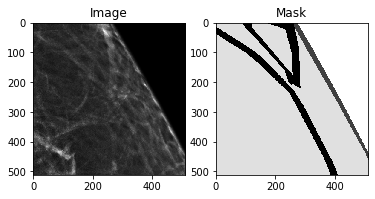

In [66]:
def show_sample(data, idx):
    sample = data[idx]
    img = sample['img'].numpy().transpose(1, 2, 0)
    mask = sample['mask'].numpy()
    
    if img.shape[2] == 1:
        img = img.squeeze(2)  # This removes the last dimension if it's 1
    if len(mask.shape) == 3 and mask.shape[-1] == 1:
        mask = mask.squeeze(axis=-1)  # Similarly for the mask
    elif len(mask.shape) == 2:
        # Mask is already in the correct format (height, width)
        pass
    else:
        raise ValueError("Mask has an unexpected shape.")

    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Image')
    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title('Mask')
    plt.show()

show_sample(dataset, 1)  # Show the first sample

In [64]:
from torch.utils.data import DataLoader

# Assuming you have a large dataset, you might want to use a subset for this calculation
# to save time. Here, we're using the entire dataset for completeness.
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)


100%|██████████| 258/258 [04:57<00:00,  1.15s/it]

Channel-wise Mean: [0.18006138]
Channel-wise Std: [0.22171646]
